---
title: "관계기반형 질의를 통한 장면 검색 (SESE Module)"
subtitle: "ScEne SEarch Module"
description: "SESE Module 사용법을 설명합니다."
image: ../images/1_sese/thumbnail2.png
author: "Hyesu Hwang"
date: "2023-10-01"
categories: [Python, Text, Video, DB, Fine-tuning]
open-graph:
  description: "ScEne SEarch Module"
  image: ../images/1_sese/thumbnail2.png
twitter-card:
  description: "ScEne SEarch Module"
  image: ../images/1_sese/thumbnail2.png
---

# SESE Module

### SESE 연결

- Neo4J의 본인 접속 계정 정보 입력
- MariaDB의 본인 접속 계정 정보 입력 및 저장하고자 하는 database 선택
    - 존재하지 않는 database일시 자동 생성됨

In [1]:
from SESE import SESE as db

neo4j_uri = "neo4j://localhost:7687"
neo4j_user = "neo4j"
neo4j_password = "testtest"
mariadb_user = 'dilab'
mariadb_password = '1111'
mariadb_host='127.0.0.1'
mariadb_database='mydb'

C:\Users\SSU\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
sese = db(neo4j_uri, neo4j_user, neo4j_password, mariadb_user, mariadb_password, mariadb_host, mariadb_database)

---------------- Initializing NeoInterface -------------------
Connection to neo4j://localhost:7687 established
-- Successfully connected! --
connection neo4j, mariadb user name : neo4j, dilab
current neo4j version  4.4.0


### DB Create 및 Upload 과정 (Neo4j, MariaDB)
- Activitynet Caption Dataset 사용을 원할 시, 기존 csv 파일 사용
- 본인 Dataset 사용을 원할 시, github의 Scene Garph Parser를 사용하여 csv 파일 생성

In [4]:
#Neo4j, MariaDB 동시 Upload

sese.add_db(mariadb_database, './data/activitynet_10_sg.csv')

MariaDB Load Successfully!
total time elapsed:  4.705881595611572

Load the 11265 objects successfully.
total time elapsed:  118.05208230018616

Load the 3755 spos successfully.


### Searching
- get_spo() : subject, predicate, object 관계를 명확히 하여 장면을 찾고 싶을 때 사용
    - 동영상 지정 및 미지정 선택 가능 : 미지정을 원할 시 공란으로 PASS
- get_keyword() : 단순 keyword들의 조합으로 장면을 찾고 싶을 때 사용
- get_keyword_with_video() : keyword함수를 사용하여 장면을 찾을 때, 특정 동영상을 지정을 지정하고 싶은 경우 사용

Enter the 'subject' you want to search for. Separate multiple entries with a comma(,).: 
Enter the 'object' you want to search for. Separate multiple entries with a comma(,).: kitchen
Enter the 'predicate' you want to search for. Separate multiple entries with a comma(,).: 
+---------------------------------------------+----------------------------------------------------------------------------------------------------------------------+-------------------------------------+------------------------------------------------------------------+
| video_path                                  | captions                                                                                                             | spo                                 | frame                                                            |
|---------------------------------------------+----------------------------------------------------------------------------------------------------------------------+---------------

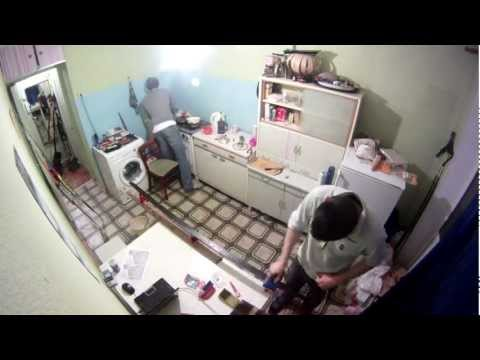

In [3]:
# 누군가가 '부엌에서' 무언가를 하고 있는 모든 장면을 검색

sese.get_spo()

Enter the 'subject' you want to search for. Separate multiple entries with a comma(,).: woman
Enter the 'object' you want to search for. Separate multiple entries with a comma(,).: camel
Enter the 'predicate' you want to search for. Separate multiple entries with a comma(,).: rides
How to link subjects and and objects?
If you use AND, the spo satisfying both subject and object is searched. If you use OR, the spo satisfying either the subject or the object is searched.
so_link : and
How to link subjects and and predicates?
If you use AND, the spo satisfying both subject and predicates is searched. If you use OR, the spo satisfying either the subject or the predicates is searched.
sp_link : and
How to link predicates and and objects?
If you use AND, the spo satisfying both predicates and objects is searched. If you use OR, the spo satisfying either the predicates or the objects is searched.
po_link : and
+---------------------------------------------+-------------------------------------

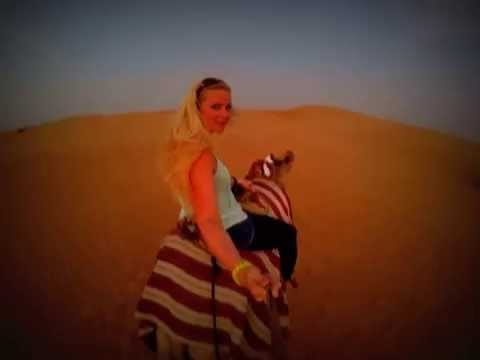

In [4]:
# '여자'가 '낙타'를 '타는' 장면을 검색

sese.get_spo()

Enter the 'subject' you want to search for. Separate multiple entries with a comma(,).: crowd
Enter the 'object' you want to search for. Separate multiple entries with a comma(,).: people
Enter the 'predicate' you want to search for. Separate multiple entries with a comma(,).: watch
How to link subjects and and objects?
If you use AND, the spo satisfying both subject and object is searched. If you use OR, the spo satisfying either the subject or the object is searched.
so_link : and
How to link subjects and and predicates?
If you use AND, the spo satisfying both subject and predicates is searched. If you use OR, the spo satisfying either the subject or the predicates is searched.
sp_link : and
How to link predicates and and objects?
If you use AND, the spo satisfying both predicates and objects is searched. If you use OR, the spo satisfying either the predicates or the objects is searched.
po_link : and
+---------------------------------------------+------------------------------------

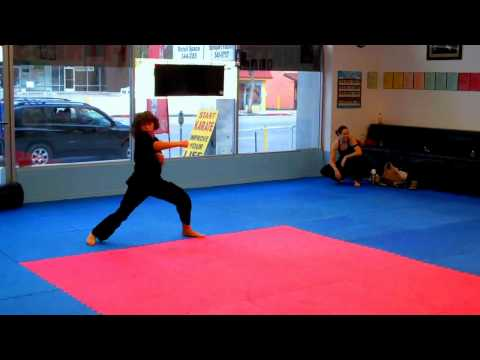

In [5]:
# '관중'이 '사람들'을 '보는' 장면 검색

sese.get_spo()

Enter the 'subject' you want to search for. Separate multiple entries with a comma(,).: audience
Enter the 'object' you want to search for. Separate multiple entries with a comma(,).: people
Enter the 'predicate' you want to search for. Separate multiple entries with a comma(,).: watch
How to link subjects and and objects?
If you use AND, the spo satisfying both subject and object is searched. If you use OR, the spo satisfying either the subject or the object is searched.
so_link : and
How to link subjects and and predicates?
If you use AND, the spo satisfying both subject and predicates is searched. If you use OR, the spo satisfying either the subject or the predicates is searched.
sp_link : and
How to link predicates and and objects?
If you use AND, the spo satisfying both predicates and objects is searched. If you use OR, the spo satisfying either the predicates or the objects is searched.
po_link : and


There are no scenes searched by the keyword you entered.
We will proceed with 

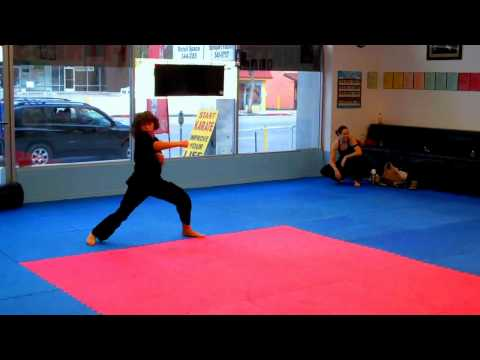

In [6]:
# '관중'이 '사람들'을 '보는' 장면 검색 _version2

sese.get_spo()

Enter the keyword you want to search for. Separate multiple entries with a comma(,). : snow
Search Keywords : ['snow']
The time required : 0.01402 sec
Number of result values :  71
+---------------------------------------------+----------+--------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+
| video                                       |   starts |   ends | captions                                                                                                                                                                                                              |   count |
|---------------------------------------------+----------+--------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------

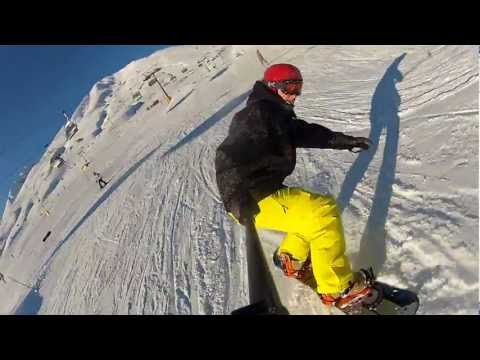

In [7]:
# 행동의 주체나 객체는 상관없이 '눈'이 포함된 모든 장면을 검색

sese.get_keyword()

Enter the keyword you want to search for. Separate multiple entries with a comma(,). : bartender,card,alchol
Search Keywords : ['bartender', 'card', 'alchol']
The time required : 0.01100 sec
Number of result values :  21
+---------------------------------------------+----------+--------+------------------------------------------------------------------------------------------------------------------+---------+
| video                                       |   starts |   ends | captions                                                                                                         |   count |
|---------------------------------------------+----------+--------+------------------------------------------------------------------------------------------------------------------+---------|
| https://www.youtube.com/watch?v=LB1A7BobPwg |    74.28 |  83.02 | The bartender puts two cards on the bar.                                                                         |       2 |
| https

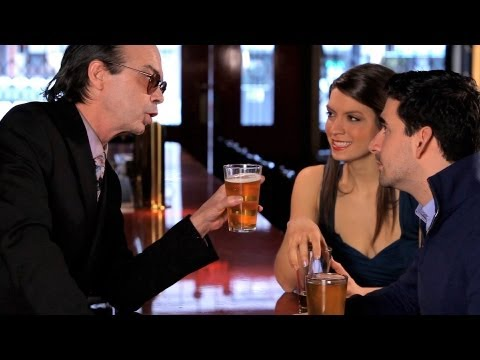

In [8]:
# 행동의 주체나 객체는 상관없이 '바텐더'와 '카드', 그리고 '술'이 등장하는 장면을 검색

sese.get_keyword()

Enter the keyword you want to search for. Separate multiple entries with a comma(,). : referee,audience,players,team
Search Keywords : ['referee', 'audience', 'players', 'team']
The time required : 0.01101 sec
Number of result values :  108
+---------------------------------------------+----------+--------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+
| video                                       |   starts |   ends | captions                                                                                                                                                                                                                                                                         |   count |
|---------------------------------------------+------

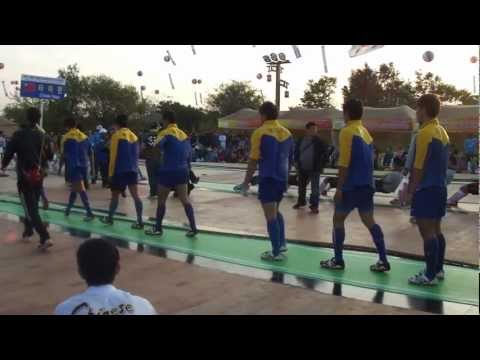

In [9]:
# 행동의 주체나 객체는 상관없이 '심판'과 '관중', '선수들', 그리고 '팀'이 등장하는 장면을 검색

sese.get_keyword()